In [20]:
library(glmnet)
library(gbm)
set.seed(10)
n <- 800
ntest <- 100
p <- 2
pi <- 1
ntree <- 1000

X <- matrix(rnorm(n*p),n,p)
beta <- rep(0,p)
beta[1:(pi*p)] <- rnorm(pi*p)/sqrt(p*pi)

y0 <- X%*%beta
y <- ifelse(y0 + rnorm(n,0,0.5*sqrt(var(y0)))>0,1,0)

# test data
Xtest <- matrix(rnorm(ntest*p),n,p)
ytest0 <- Xtest%*%beta
ytest<- ifelse(ytest0 + rnorm(n,0,0.5*sqrt(var(ytest0)))>0,1,0)


fit_gbm1 <- gbm(y~.,data=data.frame(y=y,X),interaction.depth = 1,cv.folds=5,shrinkage =0.1,n.trees = ntree,distribution = "bernoulli")
fit_gbm2 <- gbm(y~.,data=data.frame(y=y,X),interaction.depth = 1,cv.folds=5,shrinkage =0.1,n.trees = ntree,distribution = "adaboost")
gbm.perf(fit_gbm1,method="cv")
gbm.perf(fit_gbm2,method="cv")

pred_gbm1 <- predict(fit_gbm1,data.frame(Xtest),n.trees = 1:ntree)   # logodds = f
pred_gbm2 <- predict(fit_gbm2,data.frame(Xtest),n.trees = 1:ntree)   # 1/2 logodds = 1/2 f

ERROR: Error in parse(text = x, srcfile = src): <text>:15:28: 意外的'*'
14: y0 <- X%*%beta
15: y <- ifelse(y0 + rnorm(n,0,*
                               ^


[1] 123

[1] 78

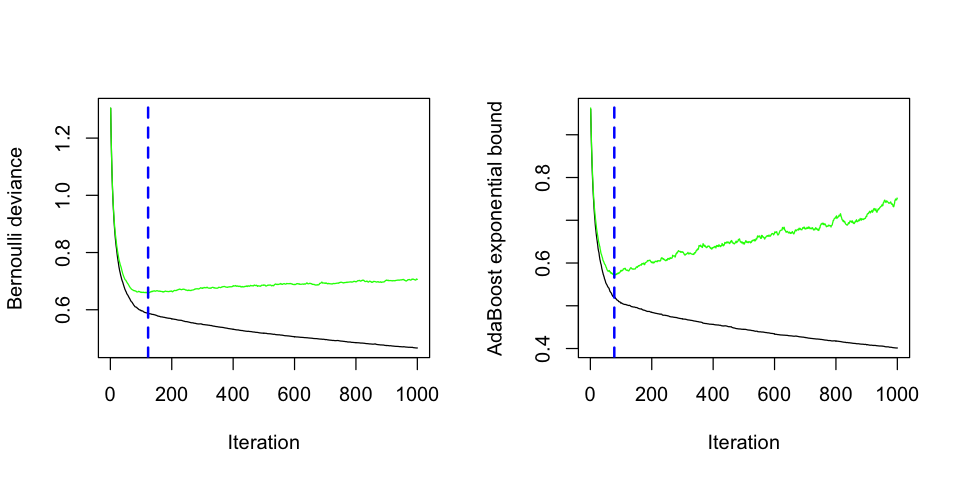

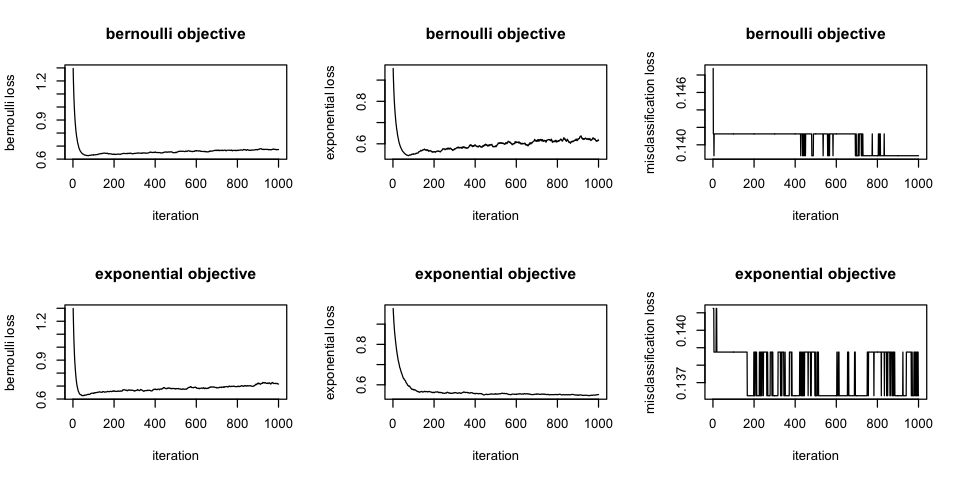

In [19]:
library(repr)
options(repr.plot.width=8, repr.plot.height=4)
loss1_logit <- apply(pred_gbm1,2,function(x) -2*mean(ytest*x-log(1+exp(x))))
loss2_logit <- apply(2*pred_gbm2,2,function(x) -2*mean(ytest*x-log(1+exp(x))))
# plot(loss1_logit,type="l",xlab="iteration",ylab="bernoulli loss",main="bernoulli objective")
# plot(loss2_logit,type="l",xlab="iteration",ylab="bernoulli loss",main="exponential objective")

loss1_ada <- apply(pred_gbm1/2,2,function(x) mean(exp(-(2*ytest-1)*x)))
loss2_ada <- apply(pred_gbm2/2,2,function(x) mean(exp(-(2*ytest-1)*x)))
# plot(loss1_ada,type="l",xlab="iteration",ylab="exponential loss",main="bernoulli objective")
# plot(loss2_ada,type="l",xlab="iteration",ylab="exponential loss",main="exponential objective")

loss1_mis <- apply(ifelse(pred_gbm1>0,1,0),2,function(x) mean(x!=ytest))
loss2_mis <- apply(ifelse(pred_gbm2>0,1,0),2,function(x) mean(x!=ytest))
# plot(loss1_mis,type="l",xlab="iteration",ylab="misclassification loss",main="bernoulli objective")
# plot(loss2_mis,type="l",xlab="iteration",ylab="misclassification loss",main="exponential objective")

# pdf("gbm_cvloss.pdf",width = 12,height=8)
par(mfrow=c(1,2))
gbm.perf(fit_gbm1,method="cv")
gbm.perf(fit_gbm2,method="cv")
# dev.off()



# pdf("gbm_predloss.pdf",width = 12,height=8)
par(mfcol=c(2,3))
plot(loss1_logit,type="l",xlab="iteration",ylab="bernoulli loss",main="bernoulli objective")
plot(loss2_logit,type="l",xlab="iteration",ylab="bernoulli loss",main="exponential objective")
plot(loss1_ada,type="l",xlab="iteration",ylab="exponential loss",main="bernoulli objective")
plot(loss2_ada,type="l",xlab="iteration",ylab="exponential loss",main="exponential objective")
plot(loss1_mis,type="l",xlab="iteration",ylab="misclassification loss",main="bernoulli objective")
plot(loss2_mis,type="l",xlab="iteration",ylab="misclassification loss",main="exponential objective")
# dev.off()
